# **Data Description**

The original dataset from the reference consists of
5 different folders, each with 100 files, with each file
representing a single subject/person. Each file is a
recording of brain activity for 23.5 seconds. The
corresponding time-series is sampled into 4097 data
points. Each data point is the value of the EEG
recording at a different point in time. So we have total 500 individuals with each has 4097 data points for
23.5 seconds.
 We divided and shuffled every 4097 data points into
23 chunks, each chunk contains 178 data points for 1
second, and each data point is the value of the EEG
recording at a different point in time. So now we have
23 x 500 = 11500 pieces of information (row), each
information contains 178 data points for 1 second
(column), the last column represents the label y {1, 2,
3, 4, and 5}.
 All subjects falling in classes 2, 3, 4, and 5 are
subjects who did not have epileptic seizures. Only
subjects in class 1 have epileptic seizures. Our
motivation for creating this version of the data was to
simplify access to the data via the creation of a .csv
version of it. Although there are 5 classes most authors
have done binary classification, namely class 1
(Epileptic seizure) against the rest.


The label from the data expresses 5 classes, each
class expresses its status:


---



---


*   Class 1 - Recording of seizure activity.
*   Class 2 - They recorder the EEG from the area where
     the tumor was located.

*   Class 3 - recording the EEG
     activity from the healthy brain area.
*   Class 4 - Eyes closed, means when they were
     recording the EEG signal the patient had their eyes
     closed.

*   Class 5 - Eyes open, means when they were
     recording the EEG signal of the brain the patient had
     their eyes open.

Table 1: Statistical work on the data

---



---


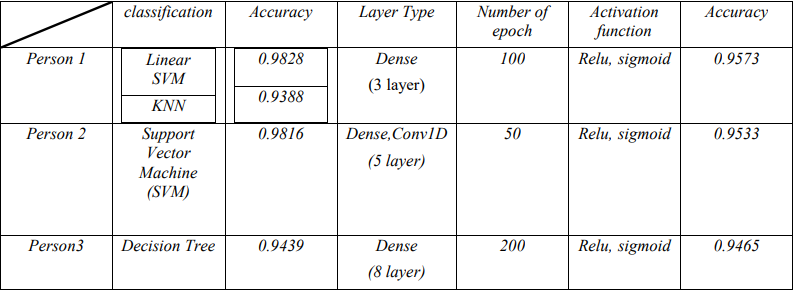

# **1- Importing the required libraries**

In [ ]:
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns 
import seaborn as sns 
import missingno as msno

# **2- Read csv file**

In [ ]:
from google.colab import files
upload=files.upload()
Full_Data=pd.read_csv('Epileptic Seizure Recognition.csv')

Saving Epileptic Seizure Recognition.csv to Epileptic Seizure Recognition.csv


In [ ]:
Full_Data.head(8)

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
5,X14.V1.56,55,28,18,16,16,19,25,40,52,...,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
6,X3.V1.191,-55,-9,52,111,135,129,103,72,37,...,-125,-99,-79,-62,-41,-26,11,67,128,4
7,X11.V1.273,1,-2,-8,-11,-12,-17,-15,-16,-18,...,-79,-91,-97,-88,-76,-72,-66,-57,-39,2


# **3-Data preparation**

We are removing Unnamed because it doesn't affect the target 

In [ ]:
DataNN=Full_Data.copy()
DataNN.drop('Unnamed',axis=1,inplace=True)

Let's separate the data into three parts : Train Data, Test Data and V
alidation Data by 

StratifiedShuffleSplit to ensure that the data is separated equally depending on label

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=2, test_size=0.10, random_state=42)
for train_index, test_index in split.split(DataNN,DataNN[['y']]):
    train_Data_ = DataNN.iloc[train_index]
    test_Data = DataNN.iloc[test_index]

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=2, test_size=0.10, random_state=42)
for train_index, test_index in split.split(train_Data_,train_Data_[['y']]):
    train_Data = train_Data_.iloc[train_index]
    val_Data = train_Data_.iloc[test_index]

In [ ]:
train_Data.shape

(9315, 179)

In [ ]:
test_Data.shape

(1150, 179)

In [ ]:
val_label=val_Data.y.copy()
train_label=train_Data.y.copy()
test_label=test_Data.y.copy()
train_Data.drop('y',axis=1,inplace=True)
val_Data.drop('y',axis=1,inplace=True)
test_Data.drop('y',axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# **4-Neural Network**

The first layer contain 64 neuron because after applied PCA  in the data ,the significant features is 53 feature , and we used a leakyReLU because avoid vanishing problem ,in addition to avoid Exploding Gradient problem we use a BatchNormalization, it's similar to standard scale

In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)
model = keras.models.Sequential()
model.add(keras.layers.Dense(64,input_dim=178,kernel_initializer='he_normal',use_bias=False))
model.add(keras.layers.LeakyReLU(alpha=.3))
model.add(keras.layers.Dense(32,kernel_initializer='he_normal'))
model.add(keras.layers.Dropout(.5))
model.add(keras.layers.Dense(16,kernel_initializer='he_normal'))
model.add(keras.layers.LeakyReLU(alpha=.3))
model.add(keras.layers.Dense(5, activation='softmax'))

If you display the model summary, you can see that each BN layer adds 4 parameters per input: γ, β, μ and σ (for example, the first BN layer adds 256 
parameters, which is 4 times 64). The last two parameters, μ and σ, are the moving
averages, they are not affected by backpropagation, so Keras calls them “Nontrainable”
 (if you count the total number of BN parameters, 256 + 128 + 64, and
divide by two, you get 224, which is the total number of non-trainable params in
this model).


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                11392     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 5)                

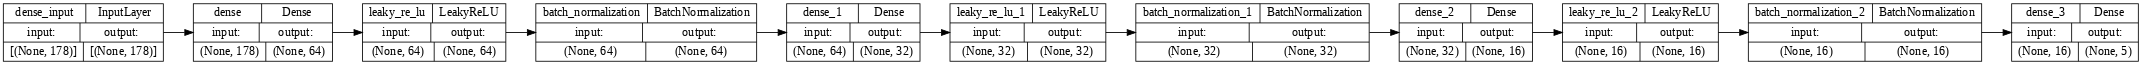

In [ ]:
keras.utils.plot_model(model,'My_model.png',show_shapes=True,dpi=60,rankdir='LR')

We use many callbacks supported by keras :


---


*   ModelCheckPoint : To save the keras model or model weights.
*   EarlyStopping : Stop training when a monitoredmetric has stopped improving.
*   LearningRateScheduler : At the beginning of every epoch, this callbacks gets the updated learning rate value from schedule function.






In [ ]:
checkpoint_=keras.callbacks.ModelCheckpoint('Best model.h5',save_best_only=True)
early_stopping=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [ ]:
model.compile(loss= 'sparse_categorical_crossentropy' ,optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01,clipnorm=10,momentum=.9),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [ ]:
def scheduler(epoch ,learning_rate):
    if(epoch<10):
      return learning_rate
    else:
      return learning_rate * tf.math.exp(-.9)
learning_Callbacks=tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
history = model.fit(train_Data, train_label-1, epochs=50,callbacks=[checkpoint_,early_stopping,learning_Callbacks],
                    validation_data=(val_Data, val_label-1))

Epoch 1/50
292/292 [==============================] - 6s 8ms/step - loss: 1.3763 - sparse_categorical_accuracy: 0.3561 - val_loss: 1.3613 - val_sparse_categorical_accuracy: 0.3990 - lr: 0.0100
Epoch 2/50
292/292 [==============================] - 1s 4ms/step - loss: 1.2887 - sparse_categorical_accuracy: 0.3969 - val_loss: 1.1537 - val_sparse_categorical_accuracy: 0.4763 - lr: 0.0100
Epoch 3/50
292/292 [==============================] - 1s 4ms/step - loss: 1.2556 - sparse_categorical_accuracy: 0.4085 - val_loss: 1.2265 - val_sparse_categorical_accuracy: 0.4329 - lr: 0.0100
Epoch 4/50
292/292 [==============================] - 1s 4ms/step - loss: 1.2176 - sparse_categorical_accuracy: 0.4446 - val_loss: 1.2004 - val_sparse_categorical_accuracy: 0.4396 - lr: 0.0100
Epoch 5/50
292/292 [==============================] - 1s 4ms/step - loss: 1.1147 - sparse_categorical_accuracy: 0.4929 - val_loss: 1.2631 - val_sparse_categorical_accuracy: 0.4155 - lr: 0.0100
Epoch 6/50
292/292 [===============

The dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training setand on the validation set, using plot(), you get the learning curves shown

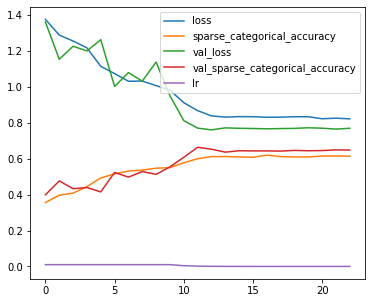

In [ ]:
pd.DataFrame(history.history).plot(figsize=(6,5))

In [ ]:
model=keras.models.load_model("Best model.h5")
model.evaluate(test_Data,test_label-1)
model.evaluate(val_Data,val_label-1)
model.evaluate(train_Data,train_label-1)

292/292 [==============================] - 1s 2ms/step - loss: 0.7395 - sparse_categorical_accuracy: 0.6642


[0.7395389676094055, 0.6641975045204163]

# **5-Binary Nerual Network**

In [ ]:
val_label_binary=(val_label==1).astype(np.float64)
train_label_binary=(train_label==1).astype(np.float64)
test_label_binary=(test_label==1).astype(np.float64)

The same model was taken except for the last layer, and a layer with one neuron was added because it is a binary problem, the weight of layer one is preserved and unaffected by backpropagation

In [ ]:
Binary_model=keras.models.Sequential(model.layers[:-1])
Binary_model.add(keras.layers.Dense(1,activation='sigmoid'))
for layer in Binary_model.layers[:1]:
  layer.trainable=False

In [ ]:
Binary_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                11392     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

In [ ]:
checkpoint_Binary=keras.callbacks.ModelCheckpoint('Best Binary model.h5',save_best_only=True)

In [ ]:
Binary_model.compile(loss= 'binary_crossentropy' ,optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01,clipnorm=10,momentum=.9),
              metrics=['accuracy'])

In [ ]:
history = Binary_model.fit(train_Data,train_label_binary, epochs=50,callbacks=[checkpoint_Binary,early_stopping,learning_Callbacks],
                    validation_data=(val_Data, val_label_binary))

Epoch 1/50
292/292 [==============================] - 3s 4ms/step - loss: 0.1647 - accuracy: 0.9399 - val_loss: 0.0801 - val_accuracy: 0.9681 - lr: 0.0100
Epoch 2/50
292/292 [==============================] - 1s 3ms/step - loss: 0.1140 - accuracy: 0.9583 - val_loss: 0.0567 - val_accuracy: 0.9778 - lr: 0.0100
Epoch 3/50
292/292 [==============================] - 1s 3ms/step - loss: 0.1103 - accuracy: 0.9596 - val_loss: 0.0592 - val_accuracy: 0.9816 - lr: 0.0100
Epoch 4/50
292/292 [==============================] - 1s 3ms/step - loss: 0.1020 - accuracy: 0.9616 - val_loss: 0.0617 - val_accuracy: 0.9797 - lr: 0.0100
Epoch 5/50
292/292 [==============================] - 1s 3ms/step - loss: 0.0979 - accuracy: 0.9626 - val_loss: 0.0814 - val_accuracy: 0.9691 - lr: 0.0100
Epoch 6/50
292/292 [==============================] - 1s 3ms/step - loss: 0.0919 - accuracy: 0.9667 - val_loss: 0.0745 - val_accuracy: 0.9797 - lr: 0.0100
Epoch 7/50
292/292 [==============================] - 1s 3ms/step - lo

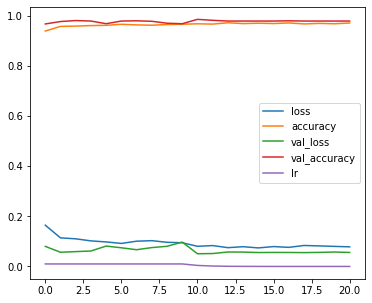

In [ ]:
pd.DataFrame(history.history).plot(figsize=(6,5))

In [ ]:
model=keras.models.load_model("Best Binary model.h5")
model.evaluate(test_Data,test_label_binary)

36/36 [==============================] - 0s 2ms/step - loss: 0.0723 - accuracy: 0.9748


[0.0722971260547638, 0.9747825860977173]

In [ ]:
def model_builder(hp):
  model=keras.Sequential()
  hp_unit1=hp.Int('units1',min_value=16,max_value=128)
  model.add(keras.layers.Dense(units= hp_unit1,input_dim=178,kernel_initializer='he_normal'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.LeakyReLU(alpha=.3))
  hp_unit2=hp.Int('units2',min_value=8,max_value=64)
  model.add(keras.layers.Dense(units= hp_unit2,kernel_initializer='he_normal'))
  model.add(keras.layers.LeakyReLU(alpha=.3))
  model.add(keras.layers.BatchNormalization())
  hp_unit3=hp.Int('units3',min_value=8,max_value=64)
  model.add(keras.layers.Dense(units= hp_unit3,kernel_initializer='he_normal'))
  model.add(keras.layers.LeakyReLU(alpha=.3))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Dense(1,activation='sigmoid'))
  hp_learning_rate=hp.Choice('learning_rate',values=[.01,.001,.0001])
  hp_clipnorm=hp.Choice('clipnorm',values=[10,20,30,40])
  model.compile(loss= 'binary_crossentropy' ,optimizer=tf.keras.optimizers.RMSprop(learning_rate=hp_learning_rate,clipnorm=  hp_clipnorm,momentum=.9),
                       metrics=['accuracy'])
  return model

In [ ]:
stop_early=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5)

In [ ]:
!pip install -q -U keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.6 MB/s eta 0:00:00


Let's try keras tuner, so that we choose the number of neuron in layer 1 2 and 3 and choose the best learning rate

In [ ]:
import keras_tuner as kt
tuner=kt.Hyperband(model_builder,objective='val_accuracy',max_epochs=15,factor=3)
tuner.search(train_Data,train_label_binary, epochs=50,validation_data=(val_Data, val_label_binary),callbacks=[stop_early])

Trial 30 Complete [00h 00m 11s]
val_accuracy: 0.9719806909561157

Best val_accuracy So Far: 0.9777777791023254
Total elapsed time: 00h 04m 39s


In [ ]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(f'''The hyperparameter search is complet. The optimal number of units in the first layer {best_hps.get('units1')},
the second layer {best_hps.get('units2')},and third layer {best_hps.get('units3')}, and the optimal learing rate {best_hps.get('learning_rate')}''')


The hyperparameter search is complet. The optimal number of units in the first layer 68,
the second layer 53,and third layer 14, and the optimal learing rate 0.001


In [ ]:
new_model=tuner.hypermodel.build(best_hps)
history=new_model.fit(train_Data,train_label_binary,epochs=50,validation_data=(val_Data, val_label_binary),callbacks=[checkpoint_,early_stopping,learning_Callbacks])

Epoch 1/50
292/292 [==============================] - 3s 5ms/step - loss: 0.2080 - accuracy: 0.9250 - val_loss: 0.0908 - val_accuracy: 0.9681 - lr: 0.0010
Epoch 2/50
292/292 [==============================] - 1s 4ms/step - loss: 0.1471 - accuracy: 0.9460 - val_loss: 0.0802 - val_accuracy: 0.9720 - lr: 0.0010
Epoch 3/50
292/292 [==============================] - 1s 4ms/step - loss: 0.1320 - accuracy: 0.9519 - val_loss: 0.0914 - val_accuracy: 0.9700 - lr: 0.0010
Epoch 4/50
292/292 [==============================] - 1s 5ms/step - loss: 0.1198 - accuracy: 0.9570 - val_loss: 0.1073 - val_accuracy: 0.9671 - lr: 0.0010
Epoch 5/50
292/292 [==============================] - 2s 7ms/step - loss: 0.1068 - accuracy: 0.9624 - val_loss: 0.0777 - val_accuracy: 0.9739 - lr: 0.0010
Epoch 6/50
292/292 [==============================] - 2s 8ms/step - loss: 0.1044 - accuracy: 0.9620 - val_loss: 0.0842 - val_accuracy: 0.9662 - lr: 0.0010
Epoch 7/50
292/292 [==============================] - 2s 7ms/step - lo

In [ ]:
new_model.evaluate(test_Data,test_label_binary)

36/36 [==============================] - 0s 2ms/step - loss: 0.1100 - accuracy: 0.9617


[0.11002267152070999, 0.9617391228675842]